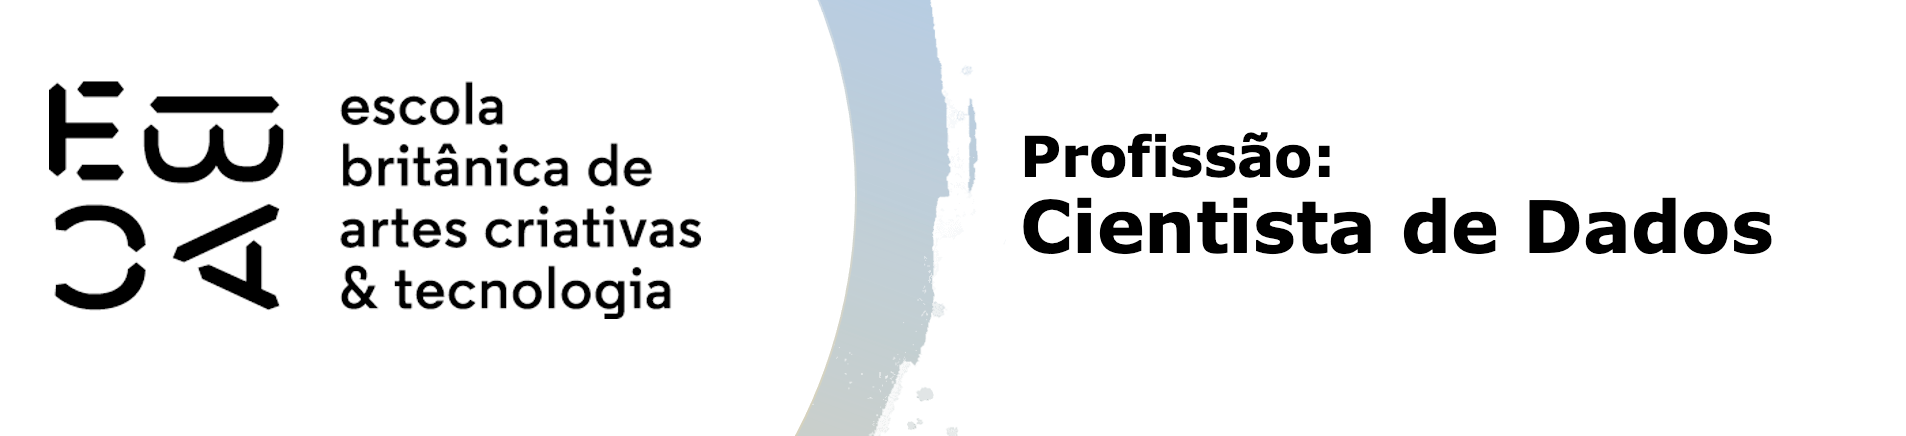

_____

## Aluno: Victor Resende

________________

# Regressão III - Tarefa

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [7]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [9]:
# Verificando valores faltantes:
print(df.isnull().sum())


index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


In [10]:
# Substituindo valores faltantes na variável 'tempo_emprego' pela média:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

# Exibindo valores faltantes após a substituição:
print("\nValores faltantes após a substituição:")
print(df.isnull().sum())


Valores faltantes após a substituição:
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [36]:
# Converter o índice para datetime e renomear:
df.index = pd.to_datetime(df.index)
df = df.rename_axis('data_ref')

# Base de holdout: 3 últimos meses:
holdout = df[df.index >= '2015-10-01']
train = df[df.index < '2015-10-01']

# Remover colunas desnecessárias para o modelo:
cols_to_drop = ['index']
x_train = train.drop(columns=cols_to_drop + ['renda'], errors='ignore')
y_train = train['renda']

x_test = holdout.drop(columns=cols_to_drop + ['renda'], errors='ignore')
y_test = holdout['renda']

# Codificar variáveis categóricas (one-hot encoding):
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Garantir que ambas as bases têm as mesmas colunas:
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Padronizar variáveis numéricas:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [39]:
# Ajustar o modelo de Regressão Linear:
model = LinearRegression()
model.fit(x_train, y_train)

# Predições e avaliação:
y_pred = model.predict(x_test)

# Cálculo do R2 ajustado:
n = x_test.shape[0]  # número de observações
p = x_test.shape[1]  # número de preditores
r2 = r2_score(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R2: {r2:.4f}")
print(f"R2 ajustado: {r2_adjusted:.4f}")


R2: -0.4163
R2 ajustado: -0.4164


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

    tempo_emprego_q  qtd_observacoes  media_log_renda  media_tempo_emprego
0                 0            37699         8.134693             0.515096
1                 1            37522         8.215925             1.124770
2                 2            37437         8.335011             1.783247
3                 3            37391         8.390223             2.513020
4                 4            37915         8.522387             3.300942
5                 5            37253         8.612289             3.989239
6                 6            37401         8.673718             4.613535
7                 7            37545         8.809638             5.367816
8                 8            37495         8.905467             6.205161
9                 9            37379         8.986450             7.010453
10               10           136607         8.815827             7.734515
11               11            13542         9.124771             7.931331
12               12      

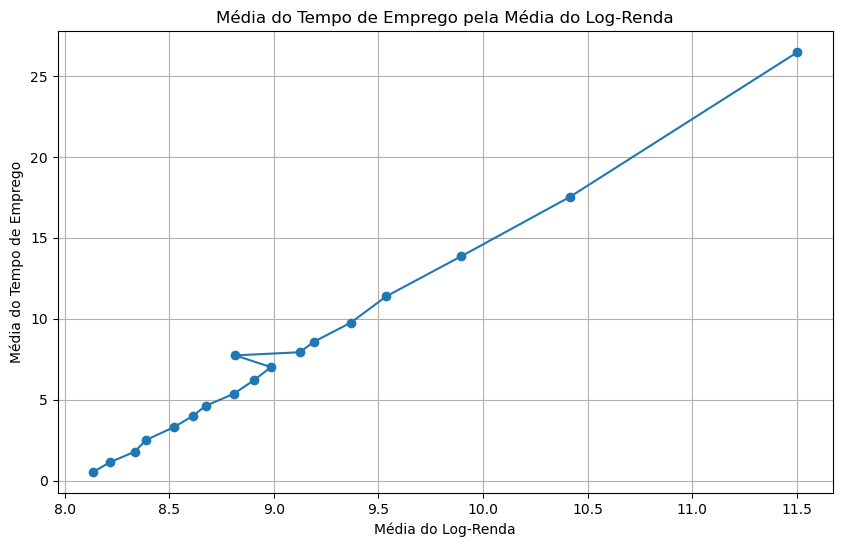

In [45]:
# --- Análise de Perfil ---

# Categorizar tempo_emprego em 20 quantis, lidando com valores duplicados:
df['tempo_emprego_q'] = pd.qcut(df['tempo_emprego'], 20, labels=False, duplicates='drop')

# Remover valores não positivos de renda antes de calcular o log:
df = df[df['renda'] > 0]

# Criar a tabela de perfil:
profile_table = df.groupby('tempo_emprego_q').agg(
    qtd_observacoes=('tempo_emprego', 'count'),
    media_log_renda=('renda', lambda x: np.log(x).mean()),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

print(profile_table)

# Gráfico: Média do tempo de emprego pela média do log-renda:
plt.figure(figsize=(10, 6))
plt.plot(profile_table['media_log_renda'], profile_table['media_tempo_emprego'], marker='o', linestyle='-')
plt.title('Média do Tempo de Emprego pela Média do Log-Renda')
plt.xlabel('Média do Log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.grid()
plt.show()


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


Resultados do R² ajustado:
Modelo Original: 0.3929
Modelo com Log(tempo_emprego): 0.3330
Modelo com tempo_emprego²: 0.3933


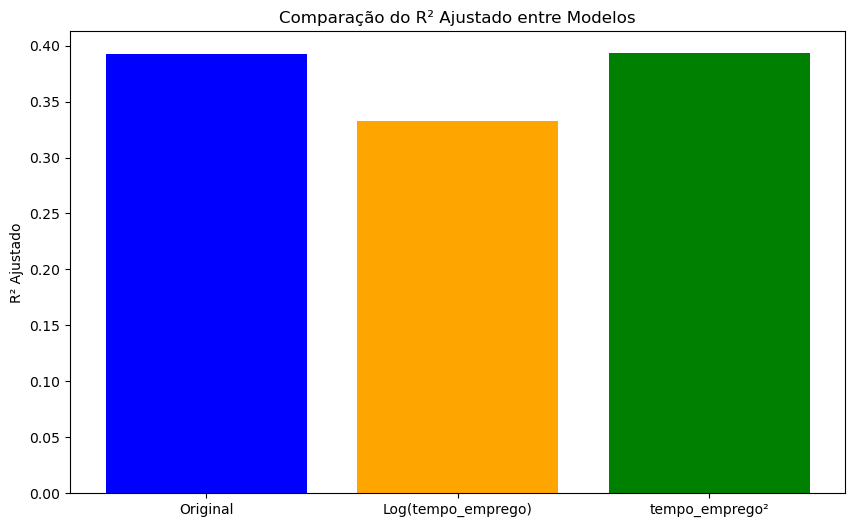

In [55]:
# --- Preparação da base ---
# Remover colunas que não devem ser usadas:
X = df.drop(columns=['renda', 'index'])  # 'data_ref' já está como índice
X = pd.get_dummies(X, drop_first=True)  # Codificação one-hot
y = np.log(df['renda'])  # Transformação log da variável resposta

# Base treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para calcular o R² ajustado:
def calcular_r2_ajustado(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Modelo original (sem transformações):
modelo_original = LinearRegression()
modelo_original.fit(X_train, y_train)
y_pred_original = modelo_original.predict(X_test)
r2_ajustado_original = calcular_r2_ajustado(y_test, y_pred_original, X_test)

# --- Técnica 1: Transformação Logarítmica ---
X_log = X.copy()
X_log['tempo_emprego'] = np.log(X['tempo_emprego'] + 1)

# Reajuste do modelo:
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, test_size=0.3, random_state=42)
modelo_log = LinearRegression()
modelo_log.fit(X_train_log, y_train)
y_pred_log = modelo_log.predict(X_test_log)
r2_ajustado_log = calcular_r2_ajustado(y_test, y_pred_log, X_test_log)

# --- Técnica 2: Transformação Polinomial ---
X_poly = X.copy()
X_poly['tempo_emprego_squared'] = X['tempo_emprego'] ** 2

# Reajuste do modelo:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)
y_pred_poly = modelo_poly.predict(X_test_poly)
r2_ajustado_poly = calcular_r2_ajustado(y_test, y_pred_poly, X_test_poly)

# --- Resultados ---
print("Resultados do R² ajustado:")
print(f"Modelo Original: {r2_ajustado_original:.4f}")
print(f"Modelo com Log(tempo_emprego): {r2_ajustado_log:.4f}")
print(f"Modelo com tempo_emprego²: {r2_ajustado_poly:.4f}")

# --- Comparação Visual ---
plt.figure(figsize=(10, 6))
plt.bar(['Original', 'Log(tempo_emprego)', 'tempo_emprego²'], 
        [r2_ajustado_original, r2_ajustado_log, r2_ajustado_poly], color=['blue', 'orange', 'green'])
plt.title('Comparação do R² Ajustado entre Modelos')
plt.ylabel('R² Ajustado')
plt.show()


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

Avaliação dos Modelos na Base de Testes:
Modelo Original:
  - R² Ajustado: 0.3929
  - RMSE: 0.9996

Modelo com Log(tempo_emprego):
  - R² Ajustado: 0.3330
  - RMSE: 1.0478

Modelo com tempo_emprego²:
  - R² Ajustado: 0.3933
  - RMSE: 0.9993


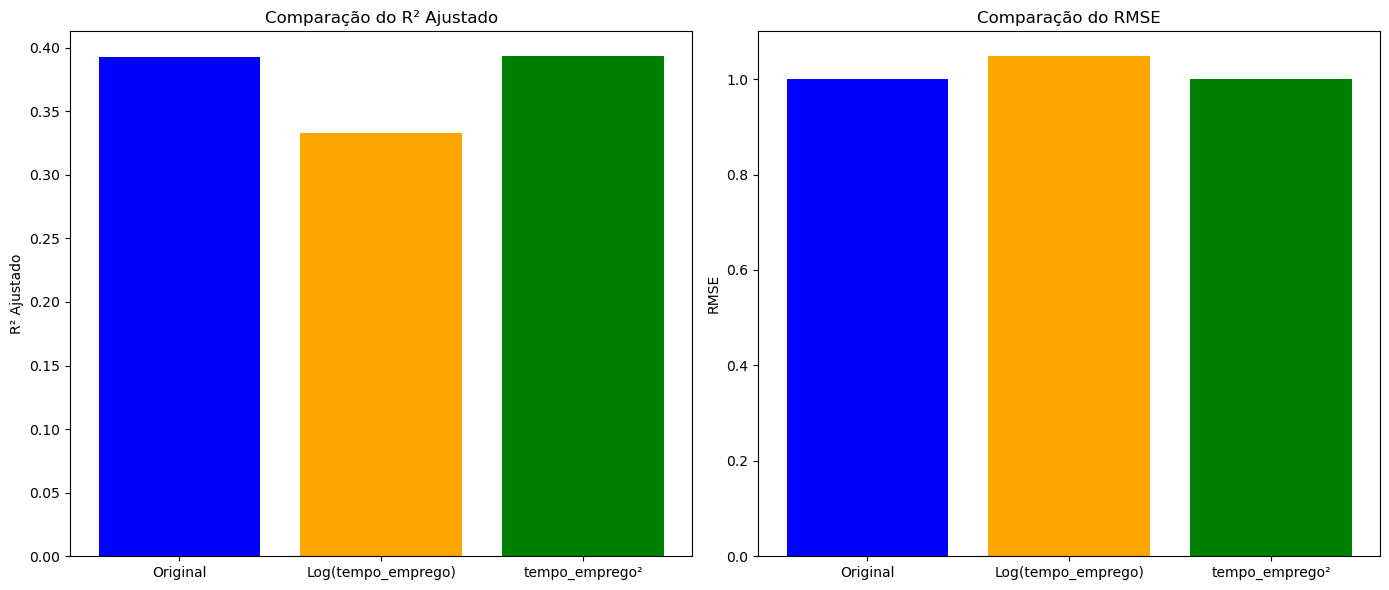

In [57]:
# --- Avaliação do modelo na base de testes ---

# Cálculo do RMSE:
def calcular_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# R² ajustado e RMSE - Modelo Original:
y_pred_original = modelo_original.predict(X_test)
r2_ajustado_original = calcular_r2_ajustado(y_test, y_pred_original, X_test)
rmse_original = calcular_rmse(y_test, y_pred_original)

# R² ajustado e RMSE - Modelo com Log(tempo_emprego):
y_pred_log = modelo_log.predict(X_test_log)
r2_ajustado_log = calcular_r2_ajustado(y_test, y_pred_log, X_test_log)
rmse_log = calcular_rmse(y_test, y_pred_log)

# R² ajustado e RMSE - Modelo com tempo_emprego²:
y_pred_poly = modelo_poly.predict(X_test_poly)
r2_ajustado_poly = calcular_r2_ajustado(y_test, y_pred_poly, X_test_poly)
rmse_poly = calcular_rmse(y_test, y_pred_poly)

# --- Resultados Finais ---
print("Avaliação dos Modelos na Base de Testes:")
print(f"Modelo Original:")
print(f"  - R² Ajustado: {r2_ajustado_original:.4f}")
print(f"  - RMSE: {rmse_original:.4f}")

print(f"\nModelo com Log(tempo_emprego):")
print(f"  - R² Ajustado: {r2_ajustado_log:.4f}")
print(f"  - RMSE: {rmse_log:.4f}")

print(f"\nModelo com tempo_emprego²:")
print(f"  - R² Ajustado: {r2_ajustado_poly:.4f}")
print(f"  - RMSE: {rmse_poly:.4f}")

# --- Comparação Visual ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico R² Ajustado:
ax[0].bar(['Original', 'Log(tempo_emprego)', 'tempo_emprego²'], 
          [r2_ajustado_original, r2_ajustado_log, r2_ajustado_poly], 
          color=['blue', 'orange', 'green'])
ax[0].set_title('Comparação do R² Ajustado')
ax[0].set_ylabel('R² Ajustado')

# Gráfico RMSE:
ax[1].bar(['Original', 'Log(tempo_emprego)', 'tempo_emprego²'], 
          [rmse_original, rmse_log, rmse_poly], 
          color=['blue', 'orange', 'green'])
ax[1].set_title('Comparação do RMSE')
ax[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()


Observações: melhoramos o R² com os modelos e mantivemos a qualidade, conforme verificamos nos gráficos comparativos.

______________